Import the libraries

In [3]:
#1
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

Import and use keypoints using Mp Holistic

In [4]:
#2
mp_holistic = mp.solutions.holistic  #holistic model
mp_drawing = mp.solutions.drawing_utils  #drawing utilities

In [5]:
#3
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #color conversion
    image.flags.writeable = False                  #image is no longer writeable
    results = model.process(image)                 #make prediction
    image.flags.writeable = True                   #image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #color conversion back
    return image, results

In [6]:
#4
#we will draw the landmarks of body parts useful in sign language detection
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image,results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face landmarks and their connections
    mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose landmarks and their connections
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [7]:
#5
def draw_styled_landmarks(image, results):
    # Draw face landmarks and their connections
    mp_drawing.draw_landmarks(image,results.face_landmarks, mp_holistic.FACEMESH_CONTOURS,
                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                              mp_drawing.DrawingSpec(color=(80,250,121), thickness=1, circle_radius=1)) 
    # Draw pose landmarks and their connections
    mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(80,33,10), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(121,55,230), thickness=2, circle_radius=2))
    # Draw right hand connections
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                              mp_drawing.DrawingSpec(color=(245,66,220), thickness=2, circle_radius=2))

In [8]:
cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence =0.5, min_tracking_confidence =0.5) as holistic:
  
  while cap.isOpened():

    #read the feed continuously till cap is open
    ret, frame = cap.read()

    #make detections
    image, results = mediapipe_detection (frame, holistic)
    print(results)

    #draw landmarks
    draw_styled_landmarks(image,results)

    #show the screen
    cv2.imshow('OpenCV Feed', image)

    #break gracefully the statement and out of loop if pressed q it will quit
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
  cap.release() #release the webcam
  cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [27]:
  cap.release() #release the webcam
  cv2.destroyAllWindows()

In [9]:
draw_landmarks(frame,results)

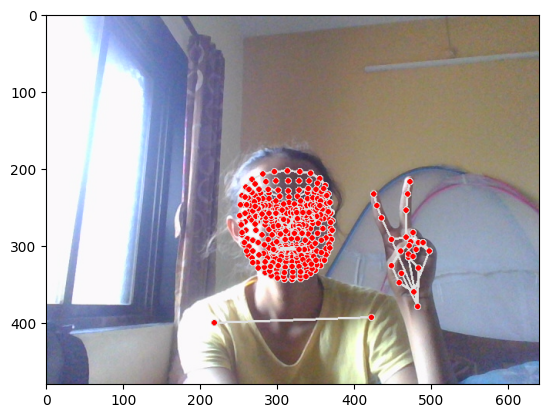

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

Now we will extract the keypoint values

In [11]:
results.face_landmarks

landmark {
  x: 0.4986364543437958
  y: 0.6253907680511475
  z: -0.02740265429019928
}
landmark {
  x: 0.4992392957210541
  y: 0.5837104916572571
  z: -0.04468521103262901
}
landmark {
  x: 0.498268723487854
  y: 0.5984722375869751
  z: -0.025622183457016945
}
landmark {
  x: 0.48921680450439453
  y: 0.5482527017593384
  z: -0.03129895031452179
}
landmark {
  x: 0.4988487660884857
  y: 0.5713863372802734
  z: -0.04667938873171806
}
landmark {
  x: 0.49774104356765747
  y: 0.5569632053375244
  z: -0.04230538010597229
}
landmark {
  x: 0.4943847060203552
  y: 0.5240375995635986
  z: -0.016491131857037544
}
landmark {
  x: 0.43011581897735596
  y: 0.5308473706245422
  z: 0.011748882941901684
}
landmark {
  x: 0.4926879405975342
  y: 0.49446430802345276
  z: -0.008208099752664566
}
landmark {
  x: 0.492109477519989
  y: 0.47770369052886963
  z: -0.008382401429116726
}
landmark {
  x: 0.4891882538795471
  y: 0.4241766929626465
  z: 0.005140320397913456
}
landmark {
  x: 0.49868044257164
  y

In [12]:
len(results.pose_landmarks.landmark)

33

In [13]:
#this step is done in single line below but I will keep this for reference
pose=[]
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [15]:
#6
def extract_keypoints(results):
    #put the landmarks in array so that we can use and perform various action on them
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z,] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z,] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    # 21*3 sine we have 21 landmarks and 3 attributes for left hand
    rh = np.array([[res.x, res.y, res.z,] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    #to get all the values concatenate that is add all together
    return np.concatenate([pose, face, lh, rh]) 


In [16]:
result_test = extract_keypoints(results)


In [17]:
result_test

array([ 0.48627305,  0.58719289, -0.55089343, ...,  0.        ,
        0.        ,  0.        ])

In [18]:
# we will save the results in this
np.save('0', result_test)

In [19]:
np.load('0.npy')

array([ 0.48627305,  0.58719289, -0.55089343, ...,  0.        ,
        0.        ,  0.        ])

Setup the folders for collection

In [66]:

#path for exported data that is numpy arrays
DATA_PATH = os.path.join('MP_DATA')

#actions that we try to detect (3 actions using 30 frames)
actions = np.array(['Hello','Thanks','Please'])
#thirty videos worth of data
no_sequences = 30
#videos are going to be 30 frames in length
sequence_length = 30


In [30]:
#Hello
## 0
## 1 ...
##29
# Thanks

In [31]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

Collect keypoint values for training and testing

In [38]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [37]:
cap.release()
cv2.destroyAllWindows()

Preprocessing data and create labels and features

In [60]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [61]:
label_map = {label:num for num, label in enumerate(actions)} 

In [64]:
label_map

{'Hello': 0, 'Thanks': 1, 'Please': 2, 'Sign': 3}

In [67]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):  #appends the frames in window 
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [68]:
sequences

[[array([ 0.4553079 ,  0.61009526, -0.7247709 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.47547221,  0.60763657, -0.8635664 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.4856782 ,  0.60346657, -0.86781657, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.48969752,  0.60136878, -0.89041841, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.49038029,  0.59754837, -0.89491099, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.49103776,  0.59415317, -0.86955822, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.49210972,  0.59423655, -0.90325946, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.49167156,  0.59383148, -0.8985796 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.49209705,  0.59372461, -0.8905614 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.49178824,  0.59311175, -0.89884406, ...,  0.        ,
       

In [69]:
np.array(sequences).shape 
  #90 videos each with 30 frames and 1662 keypoints

(90, 30, 1662)

In [80]:
x = np.array(sequences)

In [81]:
x.shape

(90, 30, 1662)

In [88]:
y = to_categorical(labels).astype(int)


In [89]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

In [91]:
x_test.shape

(5, 30, 1662)

Build and train LSTM(Lost Short Term Memory) Neural Network 

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.callbacks import TensorBoard

In [93]:
# tensorboard comes with tensorflow which monitors our training of data
log_dir = os.path.join('logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [94]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

c:\Users\Sayali\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [95]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [96]:
model.fit(x_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - categorical_accuracy: 0.0686 - loss: 1.1428 
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - categorical_accuracy: 0.3483 - loss: 3.3331
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.2054 - loss: 1.5396
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.3171 - loss: 1.2242
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - categorical_accuracy: 0.4796 - loss: 1.0789
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - categorical_accuracy: 0.6633 - loss: 0.9515
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - categorical_accuracy: 0.5148 - loss: 0.8196
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.7084 - loss: 0.6903
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - categorical_accuracy: 0.7025 - loss: 0.5620
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.7456 - loss: 0.4929
Epoch 11/2000
3/3 ━━━━━━━━━━

In [97]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

make predictions now


In [98]:
res = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step


In [99]:
actions[np.argmax(res[4])]

'Please'

In [100]:
actions[np.argmax(y_test[4])]

'Please'

Save weights

In [101]:
model.save('action.h5')

In [102]:
model.load_weights('action.h5')

Evaluation using Confusion Matrix

In [103]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
#multilabel confusion matrix will give confusion matrix for each label

In [104]:
yhat = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [105]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [106]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[2, 0],
        [0, 3]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [107]:
accuracy_score(ytrue, yhat)

1.0

Test in Real Time

In [108]:
from scipy import stats

In [109]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
#plt.figure(figsize=(7,7))
#plt.imshow(prob_viz(res, actions, image, colors))


In [115]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7


cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]  #np.expand dims....expands the dimensions for the array
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Visualization logic
            if np.unique(predictions[-10:])[0] == np.argmax(res):    #holds the prediction for last  10 frames to avoid flickering
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [113]:
cap.release()
cv2.destroyAllWindows()